# Brooke Hunter lab 5 submission

## Lab 5: Machine learning in Python

**Objectives:**
   * Engineer some features for better prediction of Seattle house prices 
   * Train a machine learning model using <code>scikit-learn</code>
   * Evaluate our machine learning model

***********
## Question 1 (10 points): 

To start, make a **new** `jupyter notebook` called `lab5_submission.ipynb` and work through the following tasks. 

The first task is answer the following questions using some of the methods we have covered in the lecture/demo. 

***********

In [1]:
# Import libraries
import pandas as pd
from shapely.geometry import Point
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Import data
df = pd.read_csv('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/seattle_house_prices.csv')

# Read dataset
coast = gpd.read_file('E:/GitHub/GeospatialDataAnalysis/geospatial-data-science/labs/lab5/Washington_coastline.shp')

In [3]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['long'], df['lat']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

* How many houses are in this dataset?

In [ ]:
num_rows = df.shape[0]
print('The number of houses in the data set is equal to the number of rows, so there are %i houses in this dataset' % (num_rows))

* How many **features** are there for predicting house price? 

In [ ]:
num_features = df.shape[1] - 1
print('The number of features in the data set for predicting house price is equal to the number of columns (minus 1 for the price), so there are %i features in this dataset to predict house price' % (num_features))

In [ ]:
df

* Are there any null values in this dataset?

There are **no** null values in this dataset.. really?

In [ ]:
df.isnull().sum()

### Correlation matrix
Correlation matrix to find the best predictors of house price of `median_house_value`.

In [ ]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

* Which three variables are best correlated with house price (include correlation coefficients)?

**Best correlated** three 

* sqft_living
* bathrooms
* bedrooms

* Which three variables are least correlated with house price (include correlation coefficients)?

**Least correlated** three 

* sqft_lot
* yr_built
* long

In [ ]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model
forest_reg_n150_orig = RandomForestRegressor(n_estimators = 150)

# Fit model
forest_reg_n150_orig.fit(X_train, y_train)


# Predict test labels predictions
predictions_n150_orig = forest_reg_n150_orig.predict(X_test)

# Compute mean-squared-error
final_mse_n150_orig = mean_squared_error(y_test , predictions_n150_orig)
final_rmse_n150_orig = np.sqrt(final_mse_n150_orig)
final_rmse_n150_orig

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions_n150_orig, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

*******

## Question 2 (30 points):

*******

* Produce a model to predict house prices. You are welcome to generate new features, scale the data, and split the data into training/testing (i.e. `train_test_split`) in any way you like. 

# Model 1  - random forest reg with distance to coast (num estimators = 30,150).
* Added distance to coastline to features

In [6]:
# Compute distance to coast for Seattle housing
distance_to_coast = []
for i in range(gdf_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(gdf_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
gdf_utm['distance_to_coast'] = distance_to_coast

In [ ]:
# Plot of distance to coastline for seattle
plt.scatter(gdf_utm['long'], gdf_utm['lat'], c=gdf_utm['distance_to_coast'])
plt.colorbar()

## Model 1 confusion matrix  - random forest reg with distance to coast (num estimators = 30,150).

In [ ]:
# Compute correlation matrix
corr_matrix = gdf_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

## Fit a model 1 to data  - random forest reg with distance to coast (num estimators = 30,150).

In [ ]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'distance_to_coast']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Define model
forest_reg_n30 = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg_n30.fit(X_train, y_train)

# Define model
forest_reg_n150 = RandomForestRegressor(n_estimators = 150)

# Fit model
forest_reg_n150.fit(X_train, y_train)

## Evaluate model 1  - random forest reg with distance to coast (num estimators = 30,150).

In [ ]:
# Predict test labels predictions
predictions_30 = forest_reg_n30.predict(X_test)

# Compute mean-squared-error
final_mse_30 = mean_squared_error(y_test , predictions_30)
final_rmse_30 = np.sqrt(final_mse_30)
final_rmse_30

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions_30, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

In [ ]:
# Predict test labels predictions
predictions_150 = forest_reg_n150.predict(X_test)

# Compute mean-squared-error
final_mse_150 = mean_squared_error(y_test , predictions_150)
final_rmse_150 = np.sqrt(final_mse_150)
final_rmse_150

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions_150, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

# Model 2 - add sqft/bedrooms

In [7]:
# add sqft living per bedroom
gdf_utm['sqft_liv_bedroom'] = gdf_utm['bedrooms']/gdf_utm['sqft_living']
#gdf_utm['sqft_liv_bedroom'].max()
#gdf_utm['bedrooms'].min()

## Model 2 confusion matrix   - add sqft/bedrooms

In [ ]:
# Compute correlation matrix
corr_matrix_2 = gdf_utm.corr()

# Display just house value correlations
corr_matrix_2["price"].sort_values(ascending= False)

In [ ]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'distance_to_coast', 'sqft_liv_bedroom']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define model
forest_reg_n150 = RandomForestRegressor(n_estimators = 150)

# Fit model
forest_reg_n150.fit(X_train, y_train)

In [ ]:
# Predict test labels predictions
predictions_150 = forest_reg_n150.predict(X_test)

# Compute mean-squared-error
final_mse_150 = mean_squared_error(y_test , predictions_150)
final_rmse_150 = np.sqrt(final_mse_150)
final_rmse_150

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions_150, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)

# Model 3 - add amazon headquarters

In [8]:
# Compute distance to coast for Seattle housing
amHQ = Point(-122.337198,47.621476)
msHQ = Point(-122.192524,47.614082)

msHQ_gdf = gpd.GeoDataFrame(geometry = [msHQ])
msHQ_gdf = msHQ_gdf.set_crs(4326)
msHQ_gdf = msHQ_gdf.to_crs(32610)

amHQ_gdf = gpd.GeoDataFrame(geometry = [amHQ])
amHQ_gdf = amHQ_gdf.set_crs(4326)
amHQ_gdf = amHQ_gdf.to_crs(32610)

distance_to_amHQ = []
distance_to_msHQ = []
for i in range(gdf_utm.shape[0]):
    distance_to_amHQ.append(amHQ_gdf.distance(gdf_utm['geometry'].iloc[i])[0])
    distance_to_msHQ.append(amHQ_gdf.distance(gdf_utm['geometry'].iloc[i])[0])
    
# Add to DataFrame
gdf_utm['distance_to_amHQ'] = distance_to_amHQ
gdf_utm['distance_to_msHQ'] = distance_to_msHQ

<AxesSubplot:>

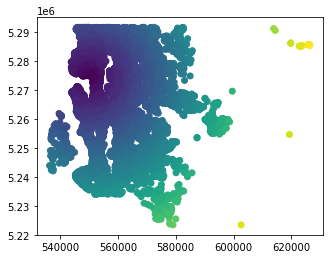

In [9]:
# Plot of distance to coastline for seattle with amazon headquarters on top
gdf_utm[['distance_to_msHQ','geometry']].plot('distance_to_msHQ')

<AxesSubplot:>

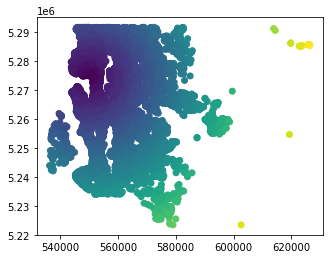

In [10]:
# Plot of distance to coastline for seattle with amazon headquarters on top
gdf_utm[['distance_to_amHQ','geometry']].plot('distance_to_amHQ')

## Model 3 confusion matrix   - add amazon headquarters (n = 150)

In [11]:
# Compute correlation matrix
corr_matrix_3 = gdf_utm.corr()

# Display just house value correlations
corr_matrix_3["price"].sort_values(ascending= False)

price                1.000000
sqft_living          0.702296
bathrooms            0.524395
bedrooms             0.315804
lat                  0.308082
sqft_lot             0.090125
yr_built             0.052453
distance_to_coast    0.027830
long                 0.020092
distance_to_amHQ    -0.302925
distance_to_msHQ    -0.302925
sqft_liv_bedroom    -0.479228
Name: price, dtype: float64

## Fit a model 3 to data  - random forest reg with distance to coast and Amz HQ (num estimators = 150).

In [12]:
# Define feature list
feature_list =  ['sqft_living', 'bathrooms', 'bedrooms', 
                 'sqft_lot', 'yr_built', 'distance_to_coast',
                 'distance_to_amHQ','distance_to_msHQ','sqft_liv_bedroom']

# Define features and labels 
X = gdf_utm[feature_list]
y = gdf_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [13]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Define model
forest_reg_n150 = RandomForestRegressor(n_estimators = 1000, n_jobs = 4)

# Fit model
forest_reg_n150.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=4)

## Evaluate model 3  - random forest reg with distance to coast and Amz HQ (num estimators = 150).

In [15]:
# Predict test labels predictions
predictions_150 = forest_reg_n150.predict(X_test)

# Compute mean-squared-error
final_mse_150 = mean_squared_error(y_test , predictions_150)
final_rmse_150 = np.sqrt(final_mse_150)
final_rmse_150

159114.63775573042

(0.0, 500000.0)

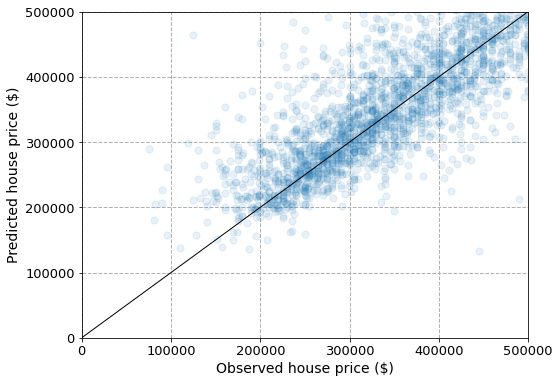

In [16]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions_150, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)